In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter


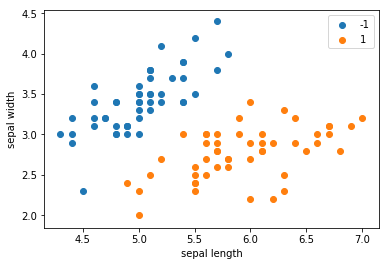

In [120]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['label'] = iris.target

df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
# print(df[:50])

X = np.array(df.iloc[:100, [0,1]])
y = np.array(df.iloc[:100, [-1]])
y = np.array([1 if i == 1 else -1 for i in y[:,-1]])

plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='-1')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

# kNN

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [122]:
class kNN:
    def __init__(self, X, y, k, p = 2):
        # k 为近邻点数量
        # p 为距离量度
        
        self.X_train = X
        self.y_train = y
        self.k = k
        self.p = p
    
    def predict(self, x):
        dis_list = []
        for i in range(len(X_train)):
            dis = np.linalg.norm(x - self.X_train[i], ord = self.p)
            dis_list.append([dis , self.y_train[i]])
        dis_list = np.array(dis_list)
        dis_list = dis_list[np.lexsort(dis_list[:,::-1].T)]
        
        dis_list = dis_list[:self.k,:]
        label1 = 0
        label2 = 0
        for i in dis_list:
            if i[1] == 1:
                label1 = label1 +1
            if i[1] == -1:
                label2 = label2 +1
            if label1 > label2:
                return 1
            else: return -1
    
    def accuracy(self, X_test, y_test):
        right = 0
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right +=1
            print('X is', X, 'the predict label is', label, 'the true label is', y)
            
        return print('the test accuracy is', right / len(X_test))

In [123]:
knn = kNN(X_train, y_train, k=3 )
knn.accuracy(X_test, y_test)

X is [4.6 3.2] the predict label is -1 the true label is -1
X is [4.6 3.1] the predict label is -1 the true label is -1
X is [5.1 3.8] the predict label is -1 the true label is -1
X is [6.  2.9] the predict label is 1 the true label is 1
X is [5.8 2.7] the predict label is 1 the true label is 1
X is [5.8 4. ] the predict label is -1 the true label is -1
X is [5.5 2.4] the predict label is 1 the true label is 1
X is [5.7 4.4] the predict label is -1 the true label is -1
X is [6.7 3.1] the predict label is 1 the true label is 1
X is [5.4 3.4] the predict label is -1 the true label is -1
X is [5.7 3.8] the predict label is -1 the true label is -1
X is [5.1 2.5] the predict label is 1 the true label is 1
X is [5.3 3.7] the predict label is -1 the true label is -1
X is [6.1 2.8] the predict label is 1 the true label is 1
X is [5.1 3.7] the predict label is -1 the true label is -1
X is [4.6 3.4] the predict label is -1 the true label is -1
X is [4.7 3.2] the predict label is -1 the true labe

In [124]:
test_point = [6.5, 2.0]
print('Test Point Predict Label: {}'.format(knn.predict(test_point)))

Test Point Predict Label: 1


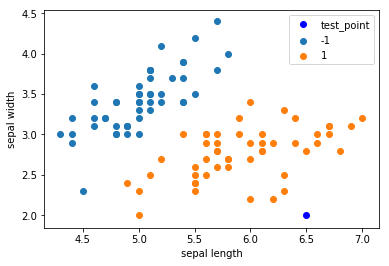

In [125]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='-1')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()